In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys
import os
sys.path.append("../")
import random
from floods.utils.gis import imread

In [ ]:
sam_checkpoint = "/home/gabrielidis/Project/segment-anything/sam_vit_l_0b3195.pth"
model_type = "vit_l"

device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
mask_generator = SamAutomaticMaskGenerator(sam)


In [ ]:
FOLDER_PATH = "/home/gabrielidis/These/flood/mmflood/processed_data/val"

In [120]:
random_file = random.choice(os.listdir(FOLDER_PATH + "/sar/"))
print(random_file)
sar = imread(FOLDER_PATH + "/sar/" + random_file)
ground_truth_mask = imread(FOLDER_PATH + "/mask/" + random_file)[0]
ground_truth_mask.shape, sar.shape


EMSR258-9-1_345_934.tif


((512, 512), (2, 512, 512))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0.05208559, 0.009718962, 0.04236662, (512, 512, 3))

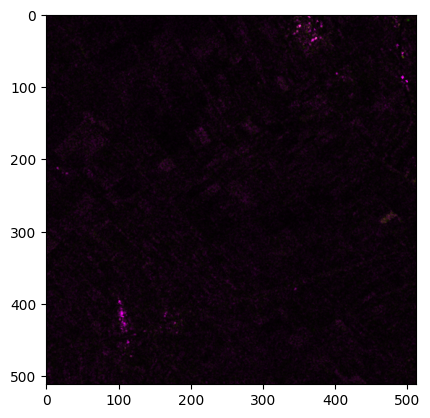

In [132]:
vv = sar[0]
vh = sar[1]

vvvh =  vv - vh

sar2rgb = np.concatenate([(vv,),(vh,),(vvvh,)],axis = 0).transpose((1,2,0))
plt.imshow(sar2rgb)
np.mean(sar2rgb[:,:,0]),np.mean(sar2rgb[:,:,1]),np.mean(sar2rgb[:,:,2]),sar2rgb.shape

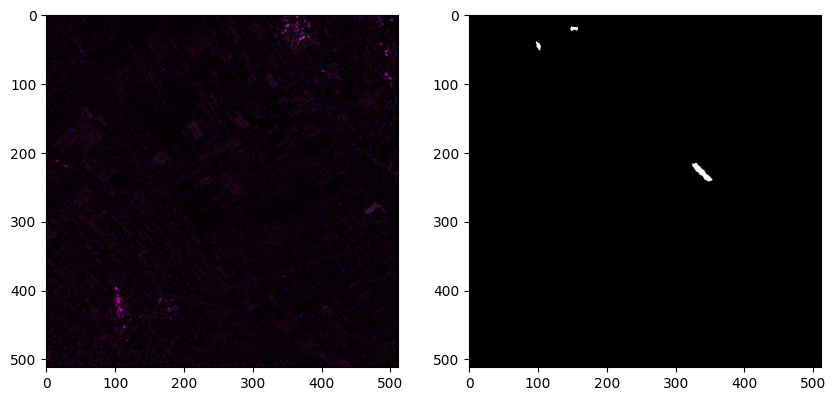

In [139]:
sar2rgb = sar2rgb * 255
sar2rgb = sar2rgb.astype("uint8")
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,10))
ax1.imshow(sar2rgb)
ax2.imshow(ground_truth_mask, cmap = "gray")


In [140]:
masks = mask_generator.generate(sar2rgb)
len(masks)

10

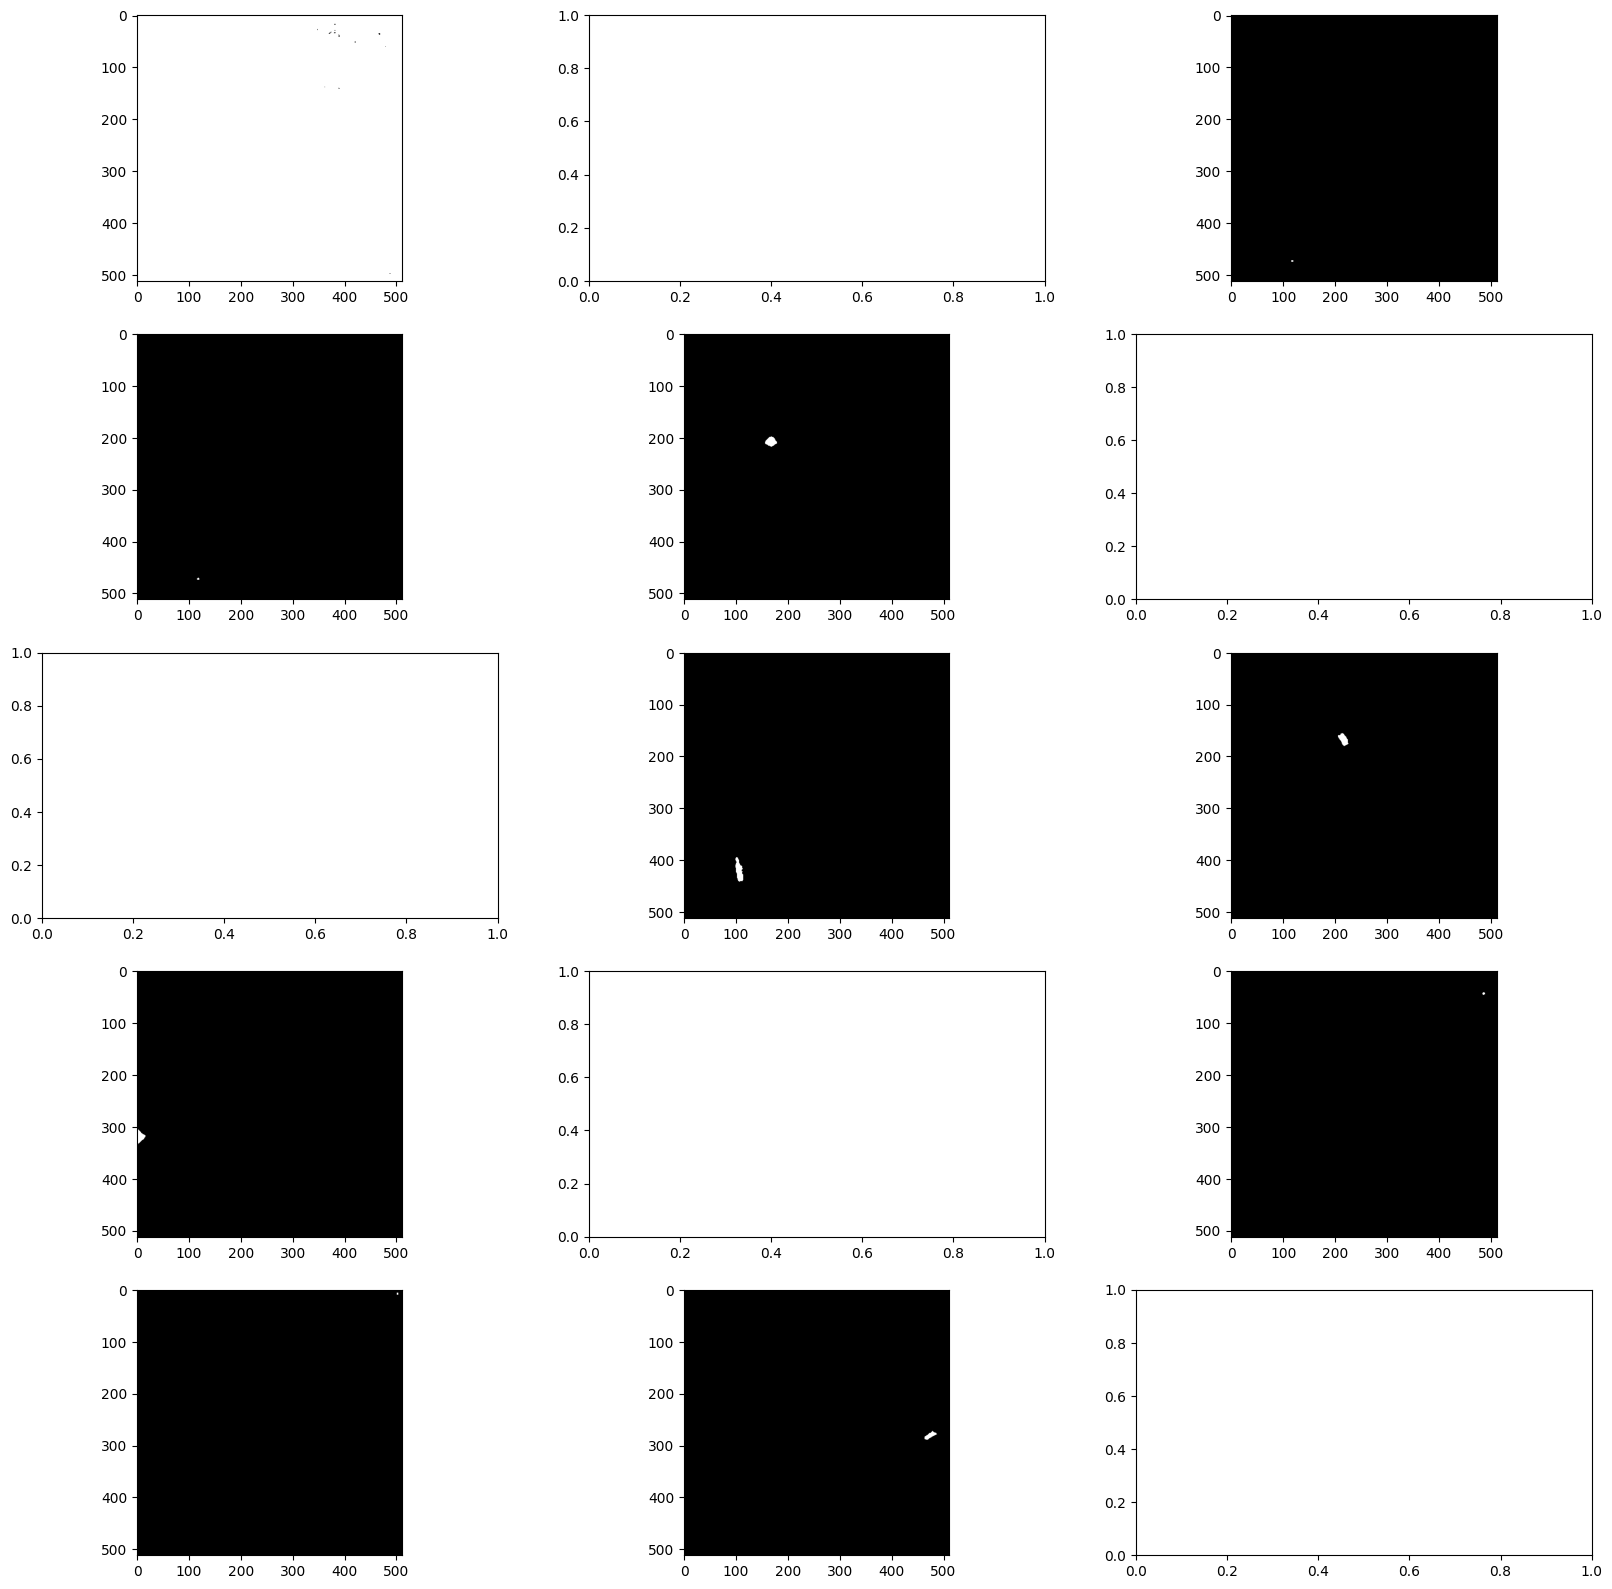

In [141]:
fig, axs = plt.subplots(5,3, figsize = (20,20))
for index,mask in enumerate(masks):
    axs[index%5,index%3].imshow(mask["segmentation"], cmap = "gray")